In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df=pd.read_csv("/content/gurgaon_property_final.csv")

In [ ]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,3,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,5,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,Relatively New,581.0,0,0,1,0,0,0,159


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3554 non-null   object 
 1   society          3554 non-null   object 
 2   sector           3554 non-null   object 
 3   price            3554 non-null   float64
 4   price_per_sqft   3554 non-null   float64
 5   bedRoom          3554 non-null   int64  
 6   bathroom         3554 non-null   int64  
 7   balcony          3554 non-null   object 
 8   floorNum         3554 non-null   float64
 9   agePossession    3554 non-null   object 
 10  built_up_area    3554 non-null   float64
 11  study room       3554 non-null   int64  
 12  servant room     3554 non-null   int64  
 13  store room       3554 non-null   int64  
 14  pooja room       3554 non-null   int64  
 15  others           3554 non-null   int64  
 16  furnishing_type  3554 non-null   int64  
 17  luxury_score  

In [ ]:
train_df=df.drop(columns=['society','price_per_sqft'])
train_df

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,581.0,0,0,1,0,0,0,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,flat,sector 84,0.37,2,2,1,5.0,Relatively New,532.0,0,0,0,0,0,0,73
3550,house,sector 109,6.00,5,5,3+,2.0,Relatively New,6228.0,1,1,1,1,0,0,160
3551,flat,sector 2,0.60,1,1,1,5.0,Moderately Old,665.0,0,0,0,0,0,1,67
3552,house,sector 43,15.50,5,6,3,3.0,Moderately Old,5490.0,1,1,1,1,0,0,76


In [ ]:
train_df.columns

Index(['property_type', 'sector', 'price', 'bedRoom', 'bathroom', 'balcony',
       'floorNum', 'agePossession', 'built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score'],
      dtype='object')

In [ ]:
num_train_col=train_df[['price', 'bedRoom', 'bathroom',
       'floorNum','built_up_area', 'study room',
       'servant room', 'store room', 'pooja room', 'others', 'furnishing_type',
       'luxury_score']]

In [ ]:
num_train_col.corr()

,price,bedRoom,bathroom,floorNum,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
price,1.000000,0.591289,0.609777,-0.087442,0.748576,0.242955,0.391930,0.305677,0.319852,-0.013064,0.225625,0.091473
bedRoom,0.591289,1.000000,0.811085,-0.085198,0.604144,0.142489,0.372577,0.196482,0.279420,0.030372,0.202431,0.066681
bathroom,0.609777,0.811085,1.000000,-0.042644,0.608927,0.150367,0.475773,0.207252,0.284572,0.041219,0.238920,0.146074
floorNum,-0.087442,-0.085198,-0.042644,1.000000,0.005875,-0.050278,0.102921,-0.091634,-0.055412,-0.005696,0.033950,0.173627
built_up_area,0.748576,0.604144,0.608927,0.005875,1.000000,0.170460,0.423287,0.195930,0.250195,-0.011806,0.169865,0.143878
study room,0.242955,0.142489,0.150367,-0.050278,0.170460,1.000000,0.169348,0.220624,0.295568,0.021656,0.133722,0.141014
servant room,0.391930,0.372577,0.475773,0.102921,0.423287,0.169348,1.000000,0.153170,0.234604,-0.022810,0.252858,0.331108
store room,0.305677,0.196482,0.207252,-0.091634,0.195930,0.220624,0.153170,1.000000,0.305643,-0.106180,0.136123,0.184032
pooja room,0.319852,0.279420,0.284572,-0.055412,0.250195,0.295568,0.234604,0.305643,1.000000,0.024315,0.193034,0.177332
others,-0.013064,0.030372,0.041219,-0.005696,-0.011806,0.021656,-0.022810,-0.106180,0.024315,1.000000,0.054842,-0.056735


<Axes: >

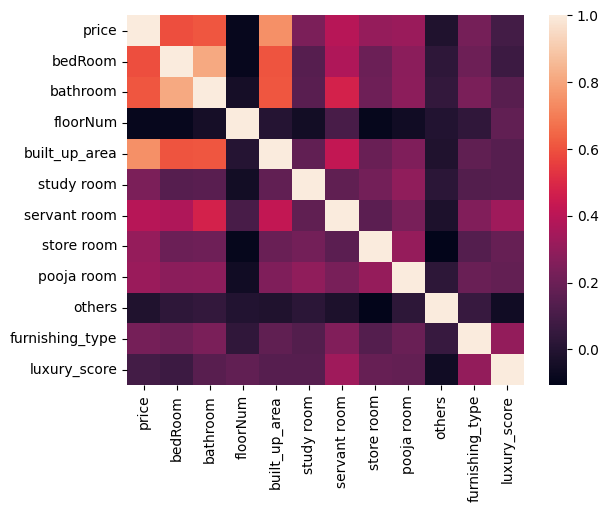

In [ ]:
sns.heatmap(num_train_col.corr())

In [ ]:
num_train_col.corr()['price'].sort_values(ascending=False)

,price
price,1.000000
built_up_area,0.748576
bathroom,0.609777
bedRoom,0.591289
servant room,0.391930
pooja room,0.319852
store room,0.305677
study room,0.242955
furnishing_type,0.225625
luxury_score,0.091473


In [ ]:
#floor_num ,other,luxury_score not sure

In [ ]:
#NOW USING THE LUXURY SCORE,WE CHANGE THE NUMERICAL COLUMN INTO 3 CATEGORIES ---LOW,MID,HIGH

### luxury score

<Axes: xlabel='luxury_score'>

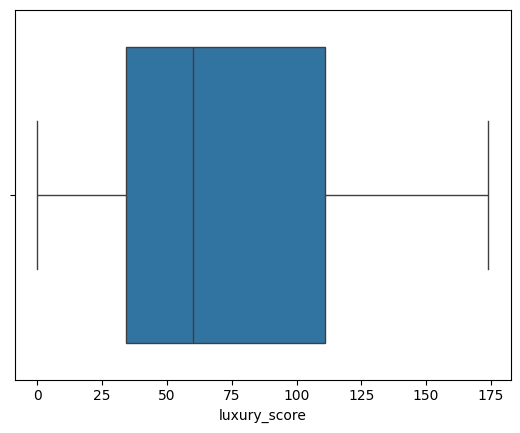

In [ ]:
sns.boxplot(x=df['luxury_score'])

In [ ]:
def cat_change(score):

  if score <50:
    return "Low"
  elif 50<= score <150:
    return "Med"
  elif score>=150:
    return "High"
  else:
    return None

In [ ]:
train_df['lux_category']=train_df['luxury_score'].apply(cat_change)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,lux_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,581.0,0,0,1,0,0,0,159,High


In [ ]:
train_df['lux_category'].value_counts()

,count
lux_category,
Low,1594
Med,1465
High,495


In [ ]:
train_df['floorNum'].describe()

,floorNum
count,3554.000000
mean,6.887451
std,6.062694
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


<ipython-input-285-73f7959f40cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['floorNum'])


<Axes: xlabel='floorNum', ylabel='Density'>

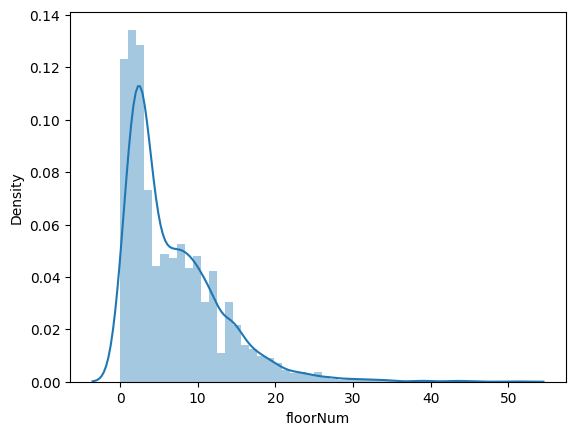

In [ ]:
sns.distplot(train_df['floorNum'])

In [ ]:
def flr_category(floor):
  if floor<=2:
    return "Low Floor"
  elif 2< floor <=10:
    return "Mid Floor"
  elif 11< floor <=51:
    return "High Floor"
  else:
    return None

In [ ]:
train_df['floor_category']=train_df['floorNum'].apply(flr_category)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,lux_category,floor_category
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,581.0,0,0,1,0,0,0,159,High,Mid Floor


In [ ]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [ ]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,lux_category,floor_category
0,flat,sector 36,0.82,3,2,2,New Property,850.0,0,0,0,0,0,0,Low,Low Floor
1,flat,sector 89,0.95,2,2,2,New Property,1226.0,1,1,0,0,0,0,Low,Mid Floor
2,flat,sohna road,0.32,2,2,1,New Property,1000.0,0,0,0,0,0,0,Low,High Floor
3,flat,sector 92,1.60,3,4,3+,Relatively New,1615.0,0,1,0,0,1,1,High,Mid Floor
4,flat,sector 102,0.48,2,2,1,Relatively New,581.0,0,0,1,0,0,0,High,Mid Floor


In [ ]:
# WHY DID WE CHANGE LUXURY SCORE AND FLOOR NUM ?
# because in our prediction model luxury rating might not be specific so that is the reason we make it an easier column to understand.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
tdf2=train_df.copy()
# choose out all the categorical columns from train_df
cat_col=train_df.select_dtypes(include=['object']).columns
# Apply label encoding to categorical columns
for col in cat_col:
  oe=OrdinalEncoder()
  tdf2[col]=oe.fit_transform(tdf2[[col]])
  print(oe.categories_)

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [ ]:
X_lab=tdf2.drop(columns=['price'],axis=1)
y_lab=tdf2['price']

In [ ]:
X_lab

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,lux_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,581.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


### TECHNIQUE 1 - CORRELATION ANALYSIS

<Axes: >

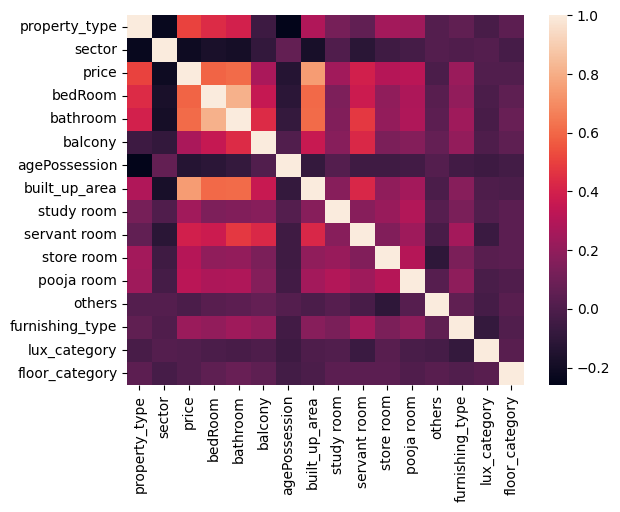

In [ ]:
sns.heatmap(tdf2.corr())

In [ ]:
fi1=tdf2.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748576
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### TECHNIQUE 2 - RANDOM FOREST FEATURE IMPORTANCE

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Train a random forest regressor on label encoded data
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_lab,y_lab)

#Extract feature importance score for label encoded data
fi2=pd.DataFrame({
    'feature':X_lab.columns,
    'rf_importance':rfr.feature_importances_
}).sort_values(by='rf_importance',ascending=False)

In [ ]:
fi2

,feature,rf_importance
6,built_up_area,0.650284
1,sector,0.102538
0,property_type,0.100210
3,bathroom,0.026706
2,bedRoom,0.023259
8,servant room,0.019358
5,agePossession,0.014181
4,balcony,0.012720
12,furnishing_type,0.010314
7,study room,0.008993


### TECHNIQUE 3 - GRADIENT BOOSTING FEATURE IMPORTANCE

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(X_lab,y_lab)

fi3=pd.DataFrame({
    'feature':X_lab.columns,
    'gb_importance':gbr.feature_importances_
}).sort_values(by='gb_importance',ascending=False)

In [ ]:
fi3

,feature,gb_importance
6,built_up_area,0.678910
1,sector,0.102007
0,property_type,0.098433
2,bedRoom,0.038044
3,bathroom,0.036120
8,servant room,0.023409
9,store room,0.010458
5,agePossession,0.003768
7,study room,0.003065
12,furnishing_type,0.002284


In [ ]:
# DUE TO ORDINAL ENCODING for example in ageposession column there are 3 catogories so it might be visually seen that 3 might give
# more importance than 1 but it does not happen because of using tree based model, in linear model it might have happened.
# RELIABLE feature importance.

### TECHNIQUE 4 - PERMUTATION IMPORTANCE

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_lab,y_lab,test_size=0.2,random_state=42)

#train the random forest regressor on label encoded data
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train,y_train)

#calculate permutation importance
pi=permutation_importance(rfr,x_test,y_test,n_repeats=30,random_state=42)

fi4=pd.DataFrame({
    'feature':X_lab.columns,
    'per_importance':pi.importances_mean
}).sort_values(by='per_importance', ascending=False)

In [ ]:
fi4

,feature,per_importance
6,built_up_area,0.736698
0,property_type,0.206916
1,sector,0.177576
2,bedRoom,0.022717
8,servant room,0.021741
3,bathroom,0.017578
5,agePossession,0.005342
14,floor_category,0.002395
13,lux_category,0.001396
9,store room,0.001315


In [ ]:
# -ve sign means when the particular feature is removed, the model performs better.

### TECHNIQUE 5 - LASSO

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

#standardize the features
sc=StandardScaler()
x_scaled=sc.fit_transform(X_lab)

#train a lasso regression model
lasso=Lasso(alpha=0.01,random_state=42)
lasso.fit(x_scaled,y_lab)

filasso=pd.DataFrame({
    'feature':X_lab.columns,
    'lasso_importance':lasso.coef_
}).sort_values(by='lasso_importance', ascending=False)

In [ ]:
filasso

,feature,lasso_importance
6,built_up_area,1.508043
0,property_type,0.714169
3,bathroom,0.277636
9,store room,0.200279
7,study room,0.172525
12,furnishing_type,0.163927
8,servant room,0.161073
10,pooja room,0.073215
13,lux_category,0.055972
2,bedRoom,0.013687


### TECHNIQUE 6 - RFE

In [ ]:
from sklearn.feature_selection import RFE

#initialize the base estimator
est=RandomForestRegressor()

#apply RFE on the label encoded and standardized training data
sel_lab=RFE(est,n_features_to_select=X_lab.shape[1],step=1)
sel_lab=sel_lab.fit(X_lab,y_lab)

sel_feature=X_lab.columns[sel_lab.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = sel_lab.estimator_.feature_importances_

# Organize the results into a DataFrame
fi6 = pd.DataFrame({
    'feature': sel_feature,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi6

,feature,rfe_score
6,built_up_area,0.648648
0,property_type,0.102489
1,sector,0.100626
2,bedRoom,0.026679
3,bathroom,0.023465
8,servant room,0.018745
5,agePossession,0.014740
4,balcony,0.013207
12,furnishing_type,0.010618
7,study room,0.009670


In [ ]:
final_df=fi1.merge(fi2,on='feature').merge(fi3,on='feature').merge(fi4,on='feature').merge(filasso,on='feature').merge(fi6,on='feature').set_index("feature")

In [ ]:
final_df

,corr_coeff,rf_importance,gb_importance,per_importance,lasso_importance,rfe_score
feature,,,,,,
sector,-0.212084,0.102538,0.102007,0.177576,-0.069948,0.100626
bedRoom,0.591289,0.023259,0.038044,0.022717,0.013687,0.026679
bathroom,0.609777,0.026706,0.036120,0.017578,0.277636,0.023465
balcony,0.269637,0.012720,0.001664,0.000807,-0.043123,0.013207
agePossession,-0.134171,0.014181,0.003768,0.005342,-0.000000,0.014740
built_up_area,0.748576,0.650284,0.678910,0.736698,1.508043,0.648648
study room,0.242955,0.008993,0.003065,-0.015987,0.172525,0.009670
servant room,0.391930,0.019358,0.023409,0.021741,0.161073,0.018745
store room,0.305677,0.008356,0.010458,0.001315,0.200279,0.008009


In [ ]:
# df.sum(axis=0)   Sum of each column
#df.sum(axis=1)    Sum of each row

In [ ]:
final_df=final_df.divide(final_df.sum(axis=0),axis=1)

In [ ]:
final_df

,corr_coeff,rf_importance,gb_importance,per_importance,lasso_importance,rfe_score
feature,,,,,,
sector,-0.063036,0.113958,0.113145,0.184158,-0.028280,0.112117
bedRoom,0.175745,0.025850,0.042198,0.023559,0.005534,0.029725
bathroom,0.181240,0.029681,0.040063,0.018229,0.112249,0.026144
balcony,0.080142,0.014137,0.001846,0.000837,-0.017435,0.014715
agePossession,-0.039879,0.015760,0.004180,0.005540,-0.000000,0.016424
built_up_area,0.222494,0.722707,0.753034,0.764003,0.609706,0.722719
study room,0.072212,0.009994,0.003399,-0.016580,0.069752,0.010774
servant room,0.116491,0.021514,0.025965,0.022547,0.065122,0.020886
store room,0.090854,0.009287,0.011599,0.001364,0.080973,0.008923


In [ ]:
final_df[['rf_importance','gb_importance','per_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

,0
feature,
built_up_area,0.740616
sector,0.130844
bedRoom,0.030333
bathroom,0.028529
servant room,0.022728
agePossession,0.010476
balcony,0.007884
store room,0.007793
lux_category,0.004661


In [ ]:
X_lab

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,lux_category,floor_category
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,0,0,0,1.0,1.0
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,1,0,0,0,0,1.0,2.0
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,0,0,0,1.0,0.0
3,0.0,99.0,3,4,4.0,3.0,1615.0,0,1,0,0,1,1,0.0,2.0
4,0.0,5.0,2,2,1.0,3.0,581.0,0,0,1,0,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,0,0,0,2.0,2.0
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,1,1,0,0,0.0,1.0
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,0,0,0,1,2.0,2.0
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,1,1,0,0,2.0,2.0


In [ ]:
# now I want to remove the columns pooja room,study room ,others

In [ ]:
#random forest(r2 score) with and without the 3 columns to justify our assumption

In [ ]:
#with all columns
from sklearn.model_selection import cross_val_score

rfr=RandomForestRegressor(n_estimators=100,random_state=42)

score=cross_val_score(rfr,X_lab,y_lab,cv=5,scoring='r2')

In [ ]:
score.mean()

np.float64(0.8204646867220596)

In [ ]:
from sklearn.model_selection import cross_val_score

rfr=RandomForestRegressor(n_estimators=100,random_state=42)

score2=cross_val_score(rfr,X_lab.drop(columns=['pooja room','study room','others']),y_lab,cv=5,scoring='r2')

In [ ]:
score2.mean()

np.float64(0.8191958574517353)

In [ ]:
df=X_lab.drop(columns=['pooja room','study room','others'])

In [ ]:
df['price']=y_lab
df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,lux_category,floor_category,price
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0,0.82
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0,0.95
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0,0.32
3,0.0,99.0,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0,1.60
4,0.0,5.0,2,2,1.0,3.0,581.0,0,1,0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,2.0,2.0,0.37
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,0,0.0,1.0,6.00
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,1,2.0,2.0,0.60
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,0,2.0,2.0,15.50


In [ ]:
df.to_csv("final_data.csv",index=False)

In [ ]:
df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,lux_category,floor_category,price
0,0.0,36.0,3,2,2.0,1.0,850.0,0,0,0,1.0,1.0,0.82
1,0.0,95.0,2,2,2.0,1.0,1226.0,1,0,0,1.0,2.0,0.95
2,0.0,103.0,2,2,1.0,1.0,1000.0,0,0,0,1.0,0.0,0.32
3,0.0,99.0,3,4,4.0,3.0,1615.0,1,0,1,0.0,2.0,1.60
4,0.0,5.0,2,2,1.0,3.0,581.0,0,1,0,0.0,2.0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,90.0,2,2,1.0,3.0,532.0,0,0,0,2.0,2.0,0.37
3550,1.0,12.0,5,5,4.0,3.0,6228.0,1,1,0,0.0,1.0,6.00
3551,0.0,23.0,1,1,1.0,0.0,665.0,0,0,1,2.0,2.0,0.60
3552,1.0,44.0,5,6,3.0,0.0,5490.0,1,1,0,2.0,2.0,15.50
